# 11.9 Representing functions as power series
## 11.9.1 Motivation

We start with a **function** $f_n(x) = 1 + x + x^2 + ... + x^n$, where $x \in \mathbb{R}$ is the domain and $n \in \mathbb{N}$ is just a constant. 

Note: There is an infinite number of these functions, one for each $n$. We can define a function of functions F(n), which takes some natural number $n$ and returns the corresponding function $f_n$ for us. However, this is not needed. Just remember that we are in the business of creating functions of x, and n is just an external parameter. 

This function $f_n$ happens to be _an instance of_ a power series. This means that we can use whatever theorems we proved so far for sequences and series to reason about what this function looks like. Remember, if $n$ is large we might not even be able to graphically plot it.

After some derivation, we arrive at:
$$
\Sigma_{n=0}^{\infty}x^n = 1 + x + x^2 + ... + x^n = \frac{1}{1-x}; |x|<1
$$


This is important to memorize, or at least tattoo inside your eyeballs. Also memorize the derivation in case it is on the exam, but the derivation itself doesn't mean very much. In general, going from an infinite series to a single-term expression is like looking for a needle in a haystack. So instead, we hang on to this one example and try to squeeze everything we possibly can out of it. The most important thing to understand intuitively is simply this:

> When you restrict the domain $x$ to the interval $[-1,1]$, the terms of the sequence will get smaller and smaller. With infinitely many terms, $f_n$ converges to the function $g(x) = \frac{1}{1-x}$ as $n \to \infty$. 

What do I mean by 'converge'? Nobody has told you what it means for one function (of x) to converge to another function (of x), because that is beyond the scope of the class. The definition of limits and convergence you have already encountered is what it means for the real-valued _output_ of the function to converge to a limit as the real-valued _input_ approaches a real-valued _point_. Intuitively, for the entire function to converge, $g(x)-f_n(x) \to 0$ for **all** $x$ in the radius of convergence as $n \to \infty$. Even more crudely, it means that their plots look more and more alike. We will see examples of this in a bit. (If you don't like thinking about functions converging to other functions, substitute x with an actual value, and then you get back to the definition of limits and convergence that you know. )



So now we know that the function with infinite terms $f_\infty$ is really just the function with one term, $g$.
Because each term becomes progressively smaller, the function with many-but-finite terms $f_n$ is an approximation to 
$g$ which always gets better and better as more terms are added.

This ends up being super important, so let's express it in code!


In [100]:
def f_approx(x, terms=10):
    # return 1/(1-x)    # Let's pretend our computer can't do division!
    sum = 0
    for n in range(0, terms):
        sum = sum + (x**n)
    return sum

You should be immediately asking the question "How many terms do we want, anyway?" and "If we are using n terms, how many digits of precision do we get?"

For now we will answer the question graphically. Observe how our approximation gets better and better the more terms we use. Also note that our approximation is exact at $x=0$ as long as we have at least one term and gets worse the further away we get. Even though $f$ converges to $g$ for all $x$ inside the radius of convergence, different $x$ converge at different speeds. This is why we often define power series using an additional parameter $a$, known as the _center_. The approximation will be exactly accurate when $x=a$, and in general become less and less accurate (= converge more slowly) the further away you get. And of course, once x is outside the radius of convergence, all results are untrustworthy. I'm not going to talk about the center too much because the center is zero by default, and if you want to approximate your function close to some x other than 0, just shift the original function along the x-axis by doing a change of variables, and when you propagate that to the infinite series, the center will automatically appear where it belongs. 

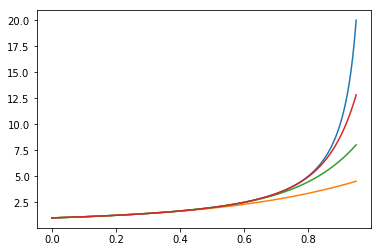

In [47]:
from matplotlib.pyplot import plot
import numpy as np

xs = np.linspace(0, 0.95, 1000)
plot(xs, [1/(1-x) for x in xs])
plot(xs, [f_approx(x,5) for x in xs])
plot(xs, [f_approx(x,10) for x in xs])
plot(xs, [f_approx(x,20) for x in xs])


Wouldn't it be neat if we could find such a _power series expansion_ for any function we'd like? Specifically:

> Given a function that has a small finite number of terms which are hard to evaluate, find an equivalent function that has an infinite number of terms which are easy to evaluate

We don't usually need to calculate approximate values of $g(x) = \frac{1}{1-x}$, but there are plenty of other functions where we desperately do. For instance, $sin(x)$. Have you noticed that nobody has ever asked you to calculate $sin(1.2345)$ by hand? You might not know _how_ to find the power series corresponding to $sin(x)$, but after I give it to you, you can calculate sines by hand to your heart's content.

$$
sin(x) \approx x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + ...
$$

Funnily enough, when you ask your computer for the sine of something, this is how it gets it. Note that this uses the exact same polynomials ${1,x,x^2,x^3,...,x^n}$, only this time they each have a coefficient $c_n$, which is just a real number.
So for $g(x) = \frac{1}{1-x}, c_n = 1$ for all $n$, but for $sin(x), c_0 = 0, c_1 = 1, c_2 = 0, c_3 = -1/6, c_4= 0, c_5=1/120, ...$

Let's code this up!

In [98]:
from math import factorial

def sine_coefficients(n):
    if (n % 2 == 0):
        return 0
    else:
        return ((-1) ** (n//2))/(factorial(n))

def sine_approx(x, terms=10):
    sum = 0
    for n in range(0, terms):
        sum = sum + (sine_coefficients(n) * (x ** n))
    return sum


Look at how quickly it converges!

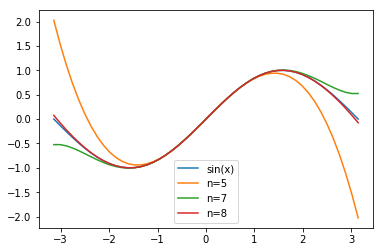

In [131]:
from matplotlib.pyplot import plot, legend
import numpy as np

xs = np.linspace(-math.pi, math.pi)
plot(xs, [math.sin(x) for x in xs])
plot(xs, [sine_approx(x,5) for x in xs])
plot(xs, [sine_approx(x,7) for x in xs])
plot(xs, [sine_approx(x,8) for x in xs])
legend(["sin(x)", "n=5", "n=7", "n=8"])

If you are thinking like a computer scientist, you might think: "Wait a second! We can approximate more or less any function we want if we can find the corresponding sequence of coefficients! Instead of having all these little functions floating around which approximate different functions using the same basic pattern, we can create a class which represents a general function approximation, and create instances for $f$, $sin$, etc!"

In [130]:
class polynomial_approximation:
    
    def __init__(self, coefficients):
        self.coefficients = list(coefficients)
        
    def eval(self, x):
        terms = len(self.coefficients)
        sum = 0
        for n in range(0, terms):
            sum = sum + self.coefficients[n] * (x ** n)
        return sum            
    
sine_approx_5 = polynomial_approximation(sine_coefficients(n) for n in range(0, 5))
sine_approx_7 = polynomial_approximation(sine_coefficients(n) for n in range(0, 7))

f_approx_20 = polynomial_approximation([1 for x in range(20)])


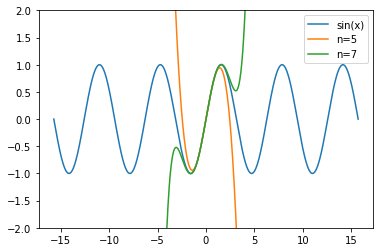

In [133]:
import matplotlib.pyplot as plt
plt.ylim(-2,2)
xs = np.linspace(-5*math.pi, 5*math.pi, 1000)

plot(xs, [math.sin(x) for x in xs])
plot(xs, [sine_approx_5.eval(x) for x in xs])
plot(xs, [sine_approx_7.eval(x) for x in xs])
legend(["sin(x)", "n=5", "n=7"])

As we've just seen, a list of coefficients is all we need to reconstruct a function. The more coefficients you use, the more accurate the resconstruction will generally be. (Within the radius of convergence, of course.) This is one of the general principles behind compressing audio data: The raw audio data is a pretty arbitrary squiggly function of voltage over time. Audio CDs have a sample frequency of 44100 Hz, which means 44100 voltage measurements per second. It gets prohibitive to store all of these. If we can find an series approximation and store the first n coefficients of that instead, we can trade off file size for audio quality.

For now we have been constructing a function which approximates a different function by adding together terms which consist of a monomial multiplied by a coefficient. However, you already know that if our center a != 0, then we are adding terms which contain a polynomial $(x-a)^n$ multiplied by a coefficient. You will soon discover that we extend this pattern way beyond mere power series, and carefully design different families of functions to be used as building blocks (called _basis functions_). These are usually other polynomials, or sines or cosines or exponentials, but sometimes even weirder things. They get added together into a _linear combination_ $c_0b_0(x) + c_1b_1(x) + ... c_nb_n(x)$. This becomes a really simple, beautiful, and widely applied idea later on.

## 11.9.2 Example

So by now hopefully you appreciate that we'd find it extremely useful to be able to convert whatever function we'd like into a power series, so that we can do things like simplify them, or evaluate them using only addition and multiplication (like computers do). However, right now we've only been shown how to convert precisely one function, $g(x)=\frac{1}{1-x}$. This raises the question: What other functions can we turn into a power series with what we already know? 

Let's start by remembering that the usual algebraic properties of distributivity, associativity, commutivity, etc continue to hold even though our series is infinite. 

### 11.9.2.1
For now, let's start super simple: We can scale everything by a constant:
$$
k + kx + kx^2 + ... + kx^n = k(1 + x + x^2 + ... + x^n) = \frac{k}{1-x}
$$

What happens to the radius of convergence if we do this? Remember we still need $|x| < 1$, so, no difference at all.

### 11.9.2.2
We have another, also completely mechanical, trick up our sleeve: substitution. 

Suppose we have $g(x) = \frac{1}{1+x}$. 

If we substitute $w = -x$, then we get $g(w) = \frac{1}{1-w} = 1 + w + w^2 + ... $ 

Substituting back, we get $g(x) = 1 + (-x) + (-x)^2 + (-x)^3 + ...$.  

Simplifying, we get $g(x) = 1 - x + x^2 - x^3 + ...$

And our radius of convergence is $|-x| < 1 \implies |x| < 1 \implies x \in (-1,1)$

### 11.9.2.3
One really cool thing we can do, which will come in super handy pretty soon, is add together infinite series.

$$ 
p(x) = p_0 + p_1 x + p_2 x^2 + p_3 x^3 + ...\\
q(x) = q_0 + q_1 x + q_2 x^2 + q_3 x^3 + ...\\
p(x) + q(x) = (p_0+q_0) + (p_1+q_1) x + (p_2+q_2) x^2 + (p_3+q_3) x^3 + ...
$$

Sometimes lots of terms cancel out, or sometimes the result can be immediately recognized as something completely different you'd never expect, and you end up with identities that don't contain infinite series at all! 


## 11.9.3 Calculus on infinite series

So far we've shown how to calculate power series expansions for functions of the form $\frac{k}{1-w(x)}$ where $k\in\mathbb{R}$ and $w : \mathbb{R} \to \mathbb{R}$. We need a little bit more knowledge if we want to do better. There is another simple and extremely effective tool to add to our infinite series toolbox: how to do differentiation and integration. (This tool will play a starring role in developing Taylor Series pretty soon)

It turns out it is super obvious thanks to linearity of the derivative operator, a.k.a. the Sum Rule: 
$$
\frac{d}{dx}[\alpha f + \beta g] = \alpha \frac{df}{dx} + \beta \frac{dg}{dx}
$$

So if $f(x) = c_0 + c_1x + c_2x^2 + c_3x^3 + ...$, then $\frac{df}{dx} = c_1 + 2 c_2 x + 3 c_3 x^2 + ...$

Integration proceeds in exactly the same manner, just in the other direction.

When working with functions represented as infinite series, we always want to remember what our radius of convergence is, because the function isn't even necessarily defined outside that region. Luckily the radius doesn't change when we differentiate or integrate the function/series.

## 11.9.4 Power Series Expansion for $ln(1+x)$

Using our newfound ability to integrate infinite series, we can already find a power series expansion for $log(x+1)$. To do this, we take advantage of two puzzle pieces which we already knew but hadn't thought to put together.

* We know that $ \int \frac{1}{1+x}dx = ln(1+x)$
* We know that $ \frac{1}{1+x} = 1 + (-x) + (-x)^2 + (-x)^3 + ... $ when $x\in(-1,1)$

See if you can find the power series by yourself, using just these two hints! Try it first without using summation notation, and secondly with summation notation.


